In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import scipy.stats as stats

In [10]:
path='/home/corinnet/workspace/aiephys/rundown_results/'
connection_folders=[os.path.join(path, d) for d in os.listdir(path)] 

# get all the csv files
csvs=[]
for folder in connection_folders:
    files=os.listdir(folder)
    try:
        csvs.append(os.path.join(folder,np.array(files)[np.array([file.endswith('.csv') for file in files])][0]))
    except:
        pass
#print csvs

/home/corinnet/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


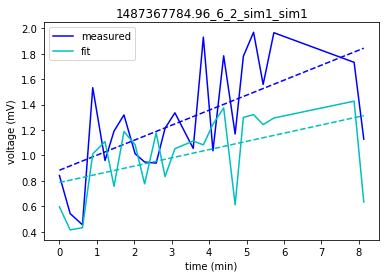

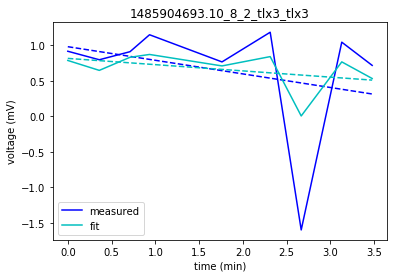

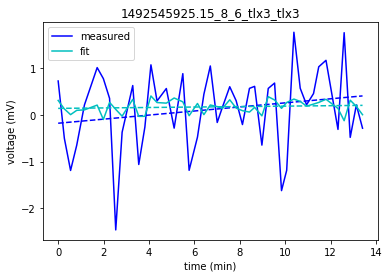

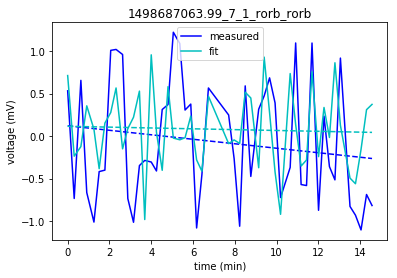

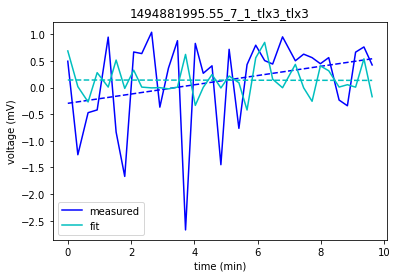

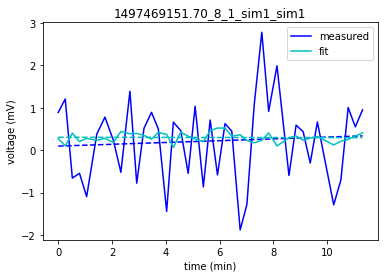

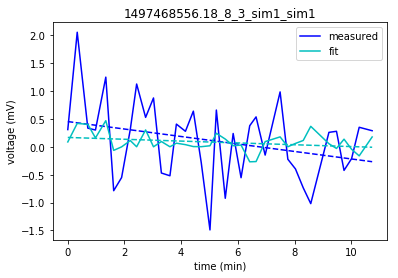

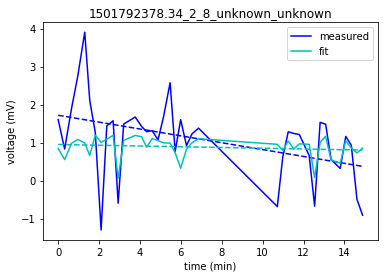

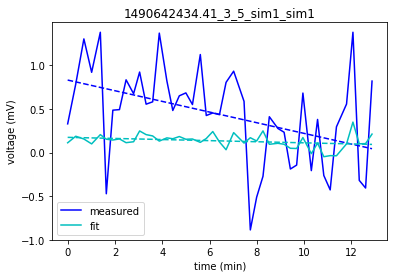

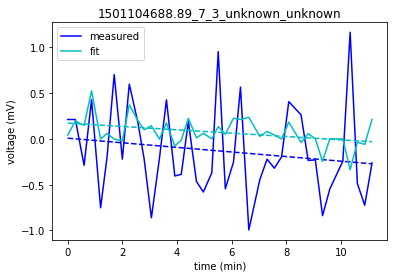

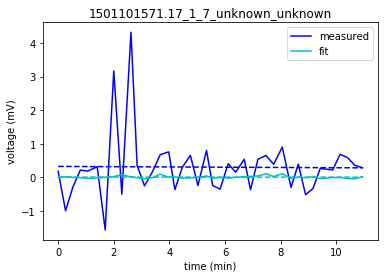

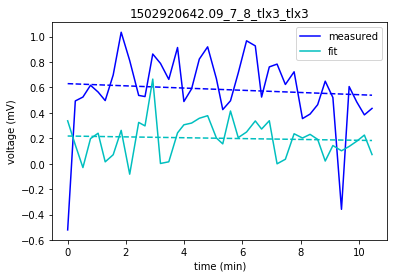

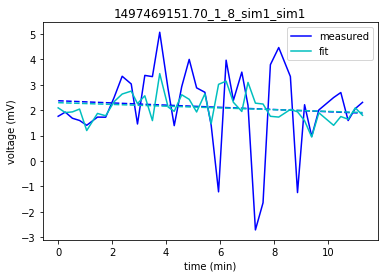

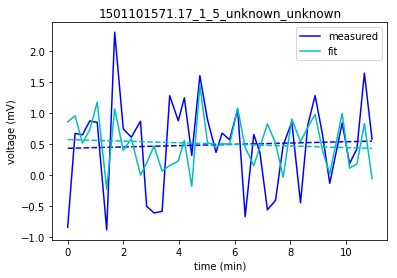

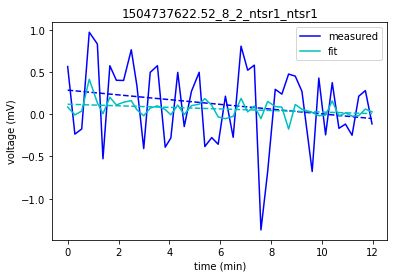

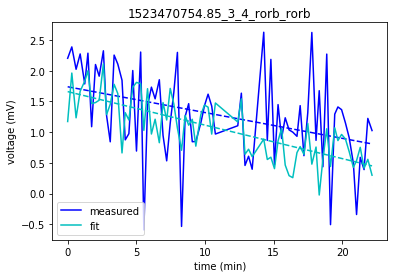

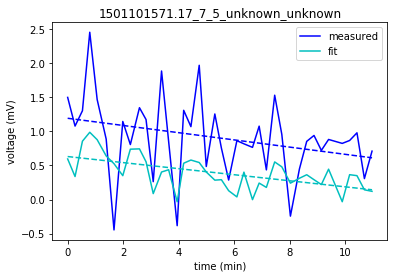

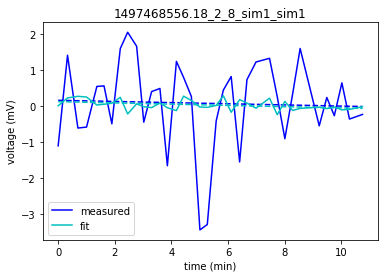

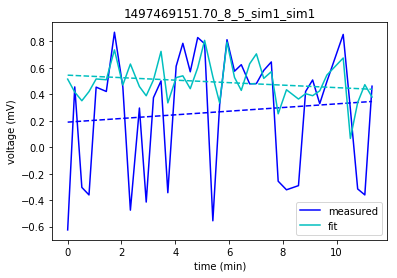

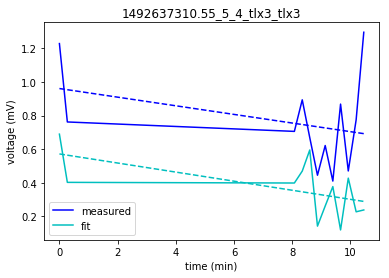

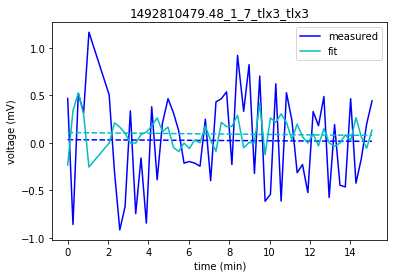

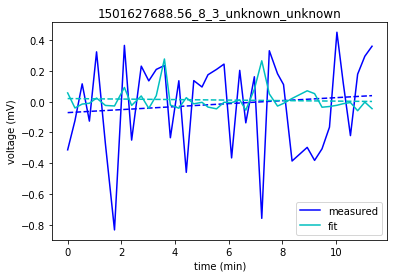

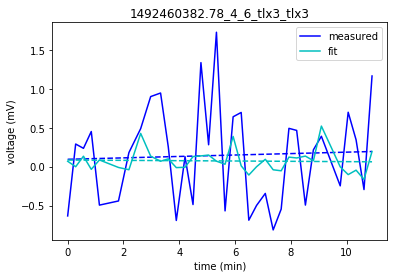

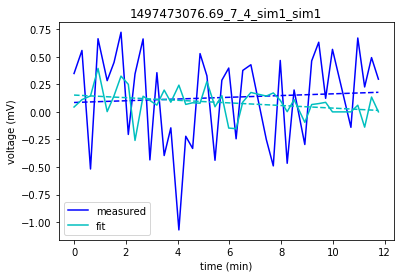

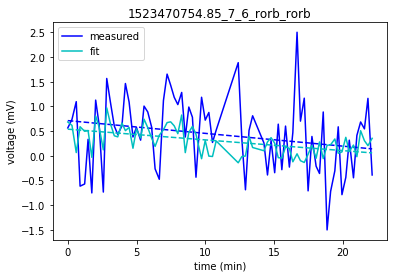

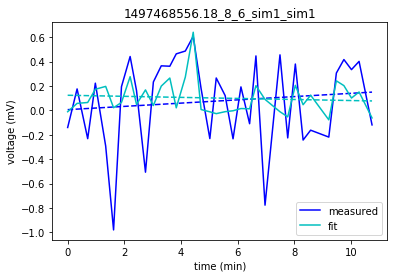

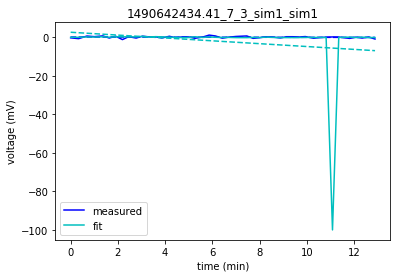

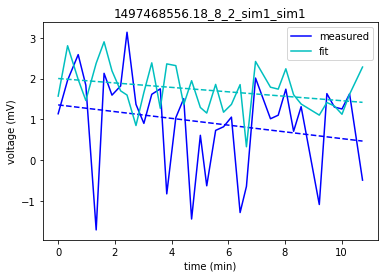

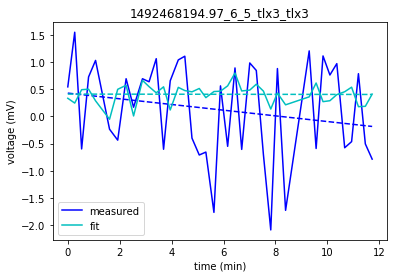

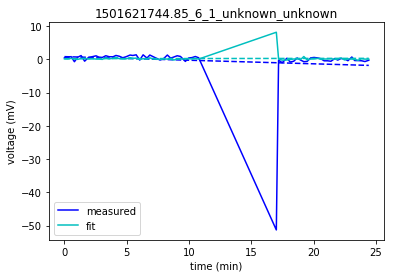

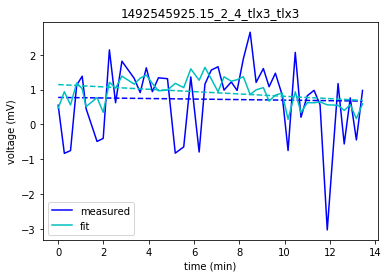

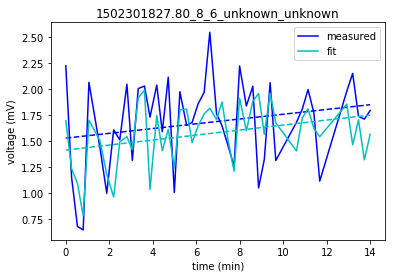

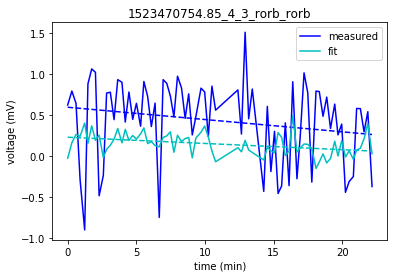

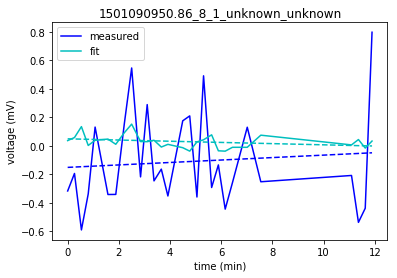

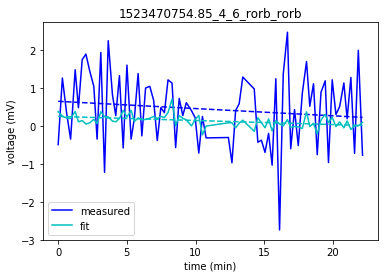

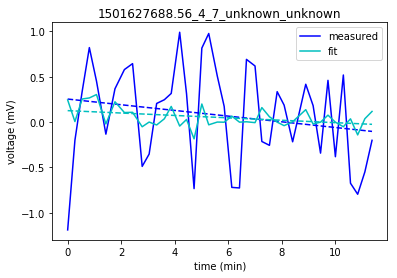

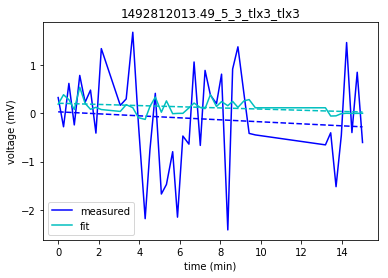

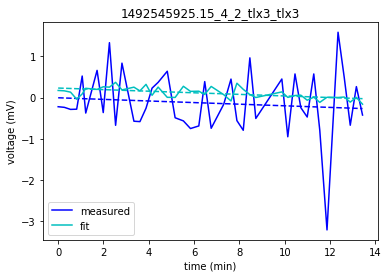

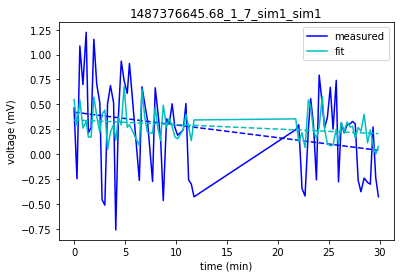

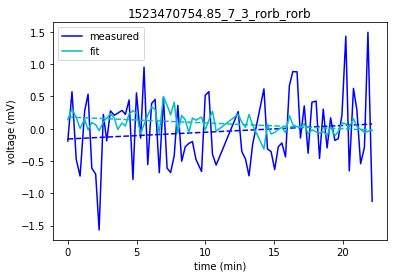

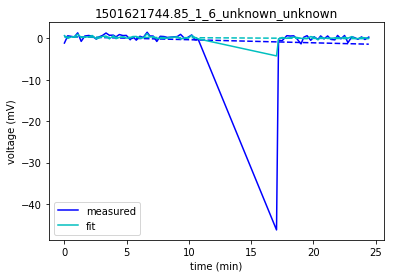

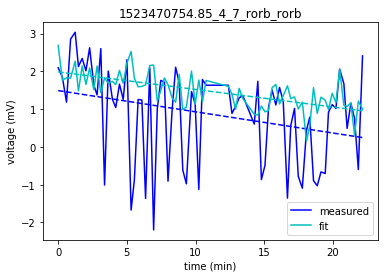

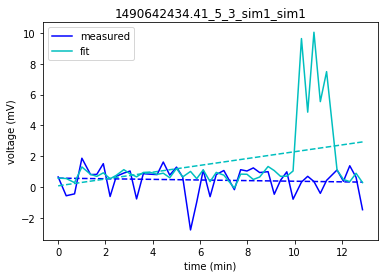

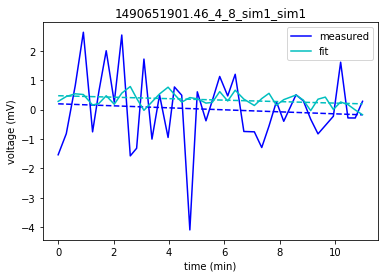

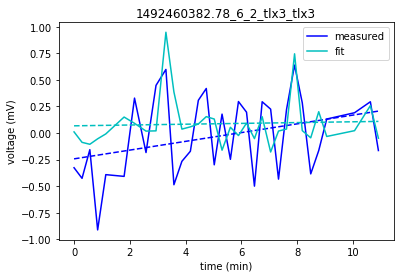

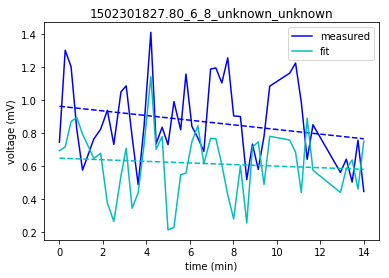

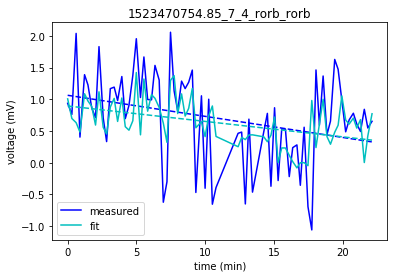

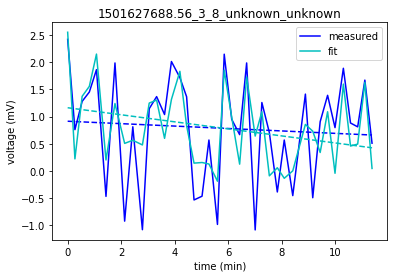

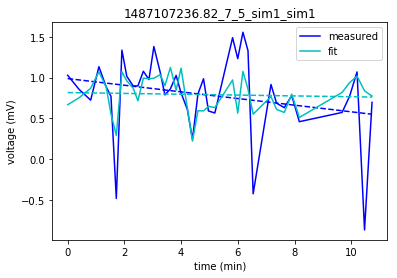

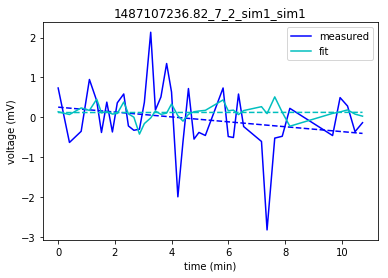

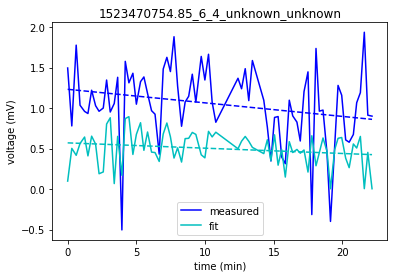

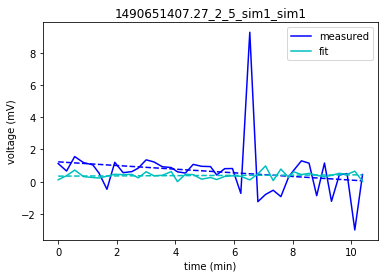

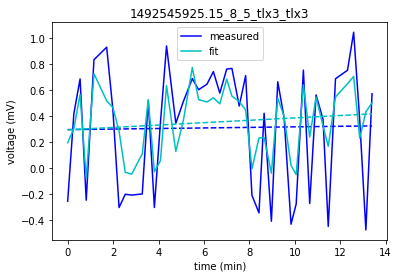

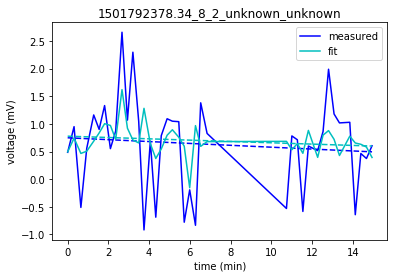

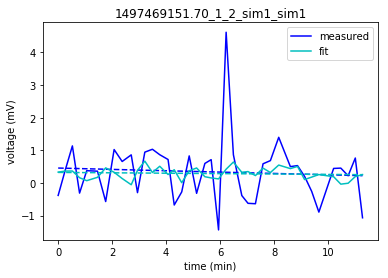

In [11]:
#Plot time versus amplitude
for file in csvs:
    df = pd.read_csv(file)
#    df=df.sort_values(by=['command_t0'])
    measured_amp=df['measured_amp'].values
    fit_amp=df['fit_amp'].values
    time=df['time'].values/60.
#    sweep=df['sweep_id']
    slope_measured, intercept_measured, _, _, _=stats.linregress(time, measured_amp)
    slope_fit, intercept_fit, _, _, _=stats.linregress(time, fit_amp)
    plt.figure()
    plt.plot(time, measured_amp*1e3, 'b', label='measured')
    plt.plot(time, (slope_measured*time+intercept_measured)*1e3, 'b--')
    
    plt.plot(time, fit_amp*1e3, 'c', label='fit')
    plt.plot(time, (slope_fit*time+intercept_fit)*1e3, 'c--')

    plt.title(os.path.dirname(file).split('/')[-1])
    plt.ylabel('voltage (mV)')
    plt.xlabel('time (min)')
    plt.legend()

In [12]:
# These are all pretty good fits
sim1=['1487367784.96_6_2_sim1_sim1',
        '1497469151.70_8_1_sim1_sim1',
        '1497469151.70_1_8_sim1_sim1',
        '1487376645.68_1_7_sim1_sim1',
        '1497469151.70_8_5_sim1_sim1',
        '1497468556.18_8_2_sim1_sim1',
        '1497468556.18_8_6_sim1_sim1',
        '1490651901.46_4_8_sim1_sim1',
        '1487107236.82_7_5_sim1_sim1',
        '1487107236.82_7_2_sim1_sim1',
        '1490651407.27_2_5_sim1_sim1',
        '1497469151.70_1_2_sim1_sim1'] #12

           
unknown=['1523470754.85_6_4_unknown_unknown',           
        '1501101571.17_1_5_unknown_unknown',
        '1501792378.34_2_8_unknown_unknown',
        '1501104688.89_7_3_unknown_unknown',
        '1501101571.17_7_5_unknown_unknown',
        '1502301827.80_8_6_unknown_unknown',
        '1502301827.80_6_8_unknown_unknown',
        '1501627688.56_3_8_unknown_unknown',
        '1501792378.34_8_2_unknown_unknown',
        '1501090950.86_8_1_unknown_unknown'] #9

           
tlx3=['1485904693.10_8_2_tlx3_tlx3',
        '1492545925.15_8_6_tlx3_tlx3',
        '1502920642.09_7_8_tlx3_tlx3',
        '1492545925.15_4_2_tlx3_tlx3',
        '1492812013.49_5_3_tlx3_tlx3',
        '1492545925.15_2_4_tlx3_tlx3',
        '1492468194.97_6_5_tlx3_tlx3',
        '1492460382.78_6_2_tlx3_tlx3',
        '1492545925.15_8_5_tlx3_tlx3'] #9
           
rorb=['1523470754.85_3_4_rorb_rorb',
        '1523470754.85_7_3_rorb_rorb',
        '1523470754.85_4_6_rorb_rorb',
        '1523470754.85_7_6_rorb_rorb',
        '1523470754.85_7_4_rorb_rorb'] #5

In [13]:
#get percent decay per min from the fits

def percent_decay(time, amp):
    slope, intercept, _, _, _=stats.linregress(time, amp)
    percent_per_min=(slope/intercept)*100
    print ('start %2f, ppm %2f, time %2f, total percent %2f' %(intercept, percent_per_min, time[-1], percent_per_min*time[-1])) 
    percent_total=percent_per_min*time[-1]
    return percent_per_min, percent_total

def group_percent_decay(good_expt_list):
    percent_per_min=[]
    percent_total=[]
    for s in good_expt_list:
        file=[file for file in csvs if s in file]
        if len(file)>1: raise Exception()
        print(file[0])
        df = pd.read_csv(file[0])
        amp=df['fit_amp'].values
        time=df['time'].values/60.
        ppm, pt=percent_decay(time, amp)
        percent_per_min.append(ppm)
        percent_total.append(pt)
    return np.mean(percent_per_min), np.mean(percent_total)
        
print ('sim1:', group_percent_decay(sim1))
print ('rorb:', group_percent_decay(rorb))
print ('unknown:', group_percent_decay(unknown))
print ('tlx3:', group_percent_decay(tlx3))

/home/corinnet/workspace/aiephys/rundown_results/1487367784.96_6_2_sim1_sim1/rundown.csv
start 0.000787, ppm 8.219372, time 8.132044, total percent 66.840299
/home/corinnet/workspace/aiephys/rundown_results/1497469151.70_8_1_sim1_sim1/rundown.csv
start 0.000304, ppm -0.251909, time 11.314464, total percent -2.850219
/home/corinnet/workspace/aiephys/rundown_results/1497469151.70_1_8_sim1_sim1/rundown.csv
start 0.002297, ppm -1.498507, time 11.281151, total percent -16.904882
/home/corinnet/workspace/aiephys/rundown_results/1487376645.68_1_7_sim1_sim1/rundown.csv
start 0.000343, ppm -1.331307, time 29.843661, total percent -39.731075
/home/corinnet/workspace/aiephys/rundown_results/1497469151.70_8_5_sim1_sim1/rundown.csv
start 0.000544, ppm -1.729496, time 11.314464, total percent -19.568325
/home/corinnet/workspace/aiephys/rundown_results/1497468556.18_8_2_sim1_sim1/rundown.csv
start 0.002003, ppm -2.712255, time 10.737332, total percent -29.122381
/home/corinnet/workspace/aiephys/rundo

In [ ]:
# total percent decay over experiment as was done in first round of manuscript matches
# def percent_decay_over_exp(good_expt_list):
#     percent_over_expt=[]
#     for s in good_expt_list:
#         file=[file for file in csvs if s in file]
#         if len(file)>1: raise Exception()
#         df = pd.read_csv(file[0])
#         fit_amp=df['fit_amp'].values
#         time=df['time'].values/60.
#         slope_fit, intercept_fit, _, _, _=stats.linregress(time, fit_amp)
#         psp_height_at_end=slope_fit*time[-1]+intercept_fit
#         if psp_height_at_end<0:
#             print('start', intercept_fit, 'end', psp_height_at_end)
#         percent_over_expt.append(((intercept_fit-psp_height_at_end)/intercept_fit)*100)
#     return np.mean(percent_over_expt)

# print ('sim1:', percent_decay_over_exp(sim1))
# print ('rorb:', percent_decay_over_exp(rorb))
# print ('unknown:', percent_decay_over_exp(unknown))
# print ('tlx3:', percent_decay_over_exp(tlx3))